In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from scipy.stats import pearsonr
import statsmodels.api as sm

In [22]:
# Import our cleaned and dummied data
data = pd.read_csv('data/clean_data_with_dummies.csv')

# Sorting by year, then by the day of the year
data = data.sort_values(by=['Year', 'DayOfYear'], ascending=[True, True])
print(data.columns)
data

Index(['Age', 'City_Eugene', 'City_Springfield', 'DayOfMonth', 'DayOfWeek',
       'DayOfYear', 'Gender_female', 'Gender_male', 'Gender_non_binary',
       'Gender_trans_female', 'Gender_trans_male', 'Hour', 'Month',
       'Race_alaska native', 'Race_american indian',
       'Race_american indian/alaska native', 'Race_asian',
       'Race_black/african american', 'Race_hispanic/latino',
       'Race_native hawaiian/other pacific islander', 'Race_other',
       'Race_two or more races', 'Race_white',
       'Reason for Dispatch_Check Welfare', 'Reason for Dispatch_Counseling',
       'Reason for Dispatch_EMS Assist', 'Reason for Dispatch_Fire Assist',
       'Reason for Dispatch_Police Assist',
       'Reason for Dispatch_Public Assist',
       'Reason for Dispatch_Suicidal Subject', 'Reason for Dispatch_Transport',
       'Season_Autumn', 'Season_Spring', 'Season_Summer', 'Season_Winter',
       'Year', 'cloudcover', 'conditions_Clear', 'conditions_Overcast',
       'conditions_Partia

/var/folders/bl/bhy6kgn16kx9r1j535zcctcw0000gn/T/ipykernel_19127/4066309355.py:2: DtypeWarning: Columns (1,2,23,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/clean_data_with_dummies.csv')


,Age,City_Eugene,City_Springfield,DayOfMonth,DayOfWeek,DayOfYear,Gender_female,Gender_male,Gender_non_binary,Gender_trans_female,...,solarradiation,sunrise_hour,sunset_hour,temp,tempmax,tempmin,uvindex,visibility,windgust,windspeed
0,48.0,True,False,4,0,4,True,False,False,False,...,20.0,7.0,16.0,48.6,52.0,43.0,1.0,9.3,44.3,14.9
1,34.0,False,True,14,3,14,False,True,False,False,...,26.5,7.0,16.0,44.5,53.8,38.0,3.0,9.5,11.4,8.6
2,NaN,False,True,14,3,14,NaN,NaN,NaN,NaN,...,26.5,7.0,16.0,44.5,53.8,38.0,3.0,9.5,11.4,8.6
3,NaN,False,True,14,3,14,NaN,NaN,NaN,NaN,...,26.5,7.0,16.0,44.5,53.8,38.0,3.0,9.5,11.4,8.6
4,35.0,False,True,14,3,14,False,True,False,False,...,26.5,7.0,16.0,44.5,53.8,38.0,3.0,9.5,11.4,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66456,NaN,False,True,31,6,365,NaN,NaN,NaN,NaN,...,20.1,7.0,16.0,41.1,42.9,39.9,1.0,0.5,5.8,5.5
66457,NaN,NaN,NaN,31,6,365,NaN,NaN,NaN,NaN,...,20.1,7.0,16.0,41.1,42.9,39.9,1.0,0.5,5.8,5.5
66458,17.0,True,False,31,6,365,NaN,NaN,NaN,NaN,...,20.1,7.0,16.0,41.1,42.9,39.9,1.0,0.5,5.8,5.5
66459,17.0,True,False,31,6,365,NaN,NaN,NaN,NaN,...,20.1,7.0,16.0,41.1,42.9,39.9,1.0,0.5,5.8,5.5


#### Plots Calls/Classifcations with Time

/Users/michaelsaccio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/michaelsaccio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


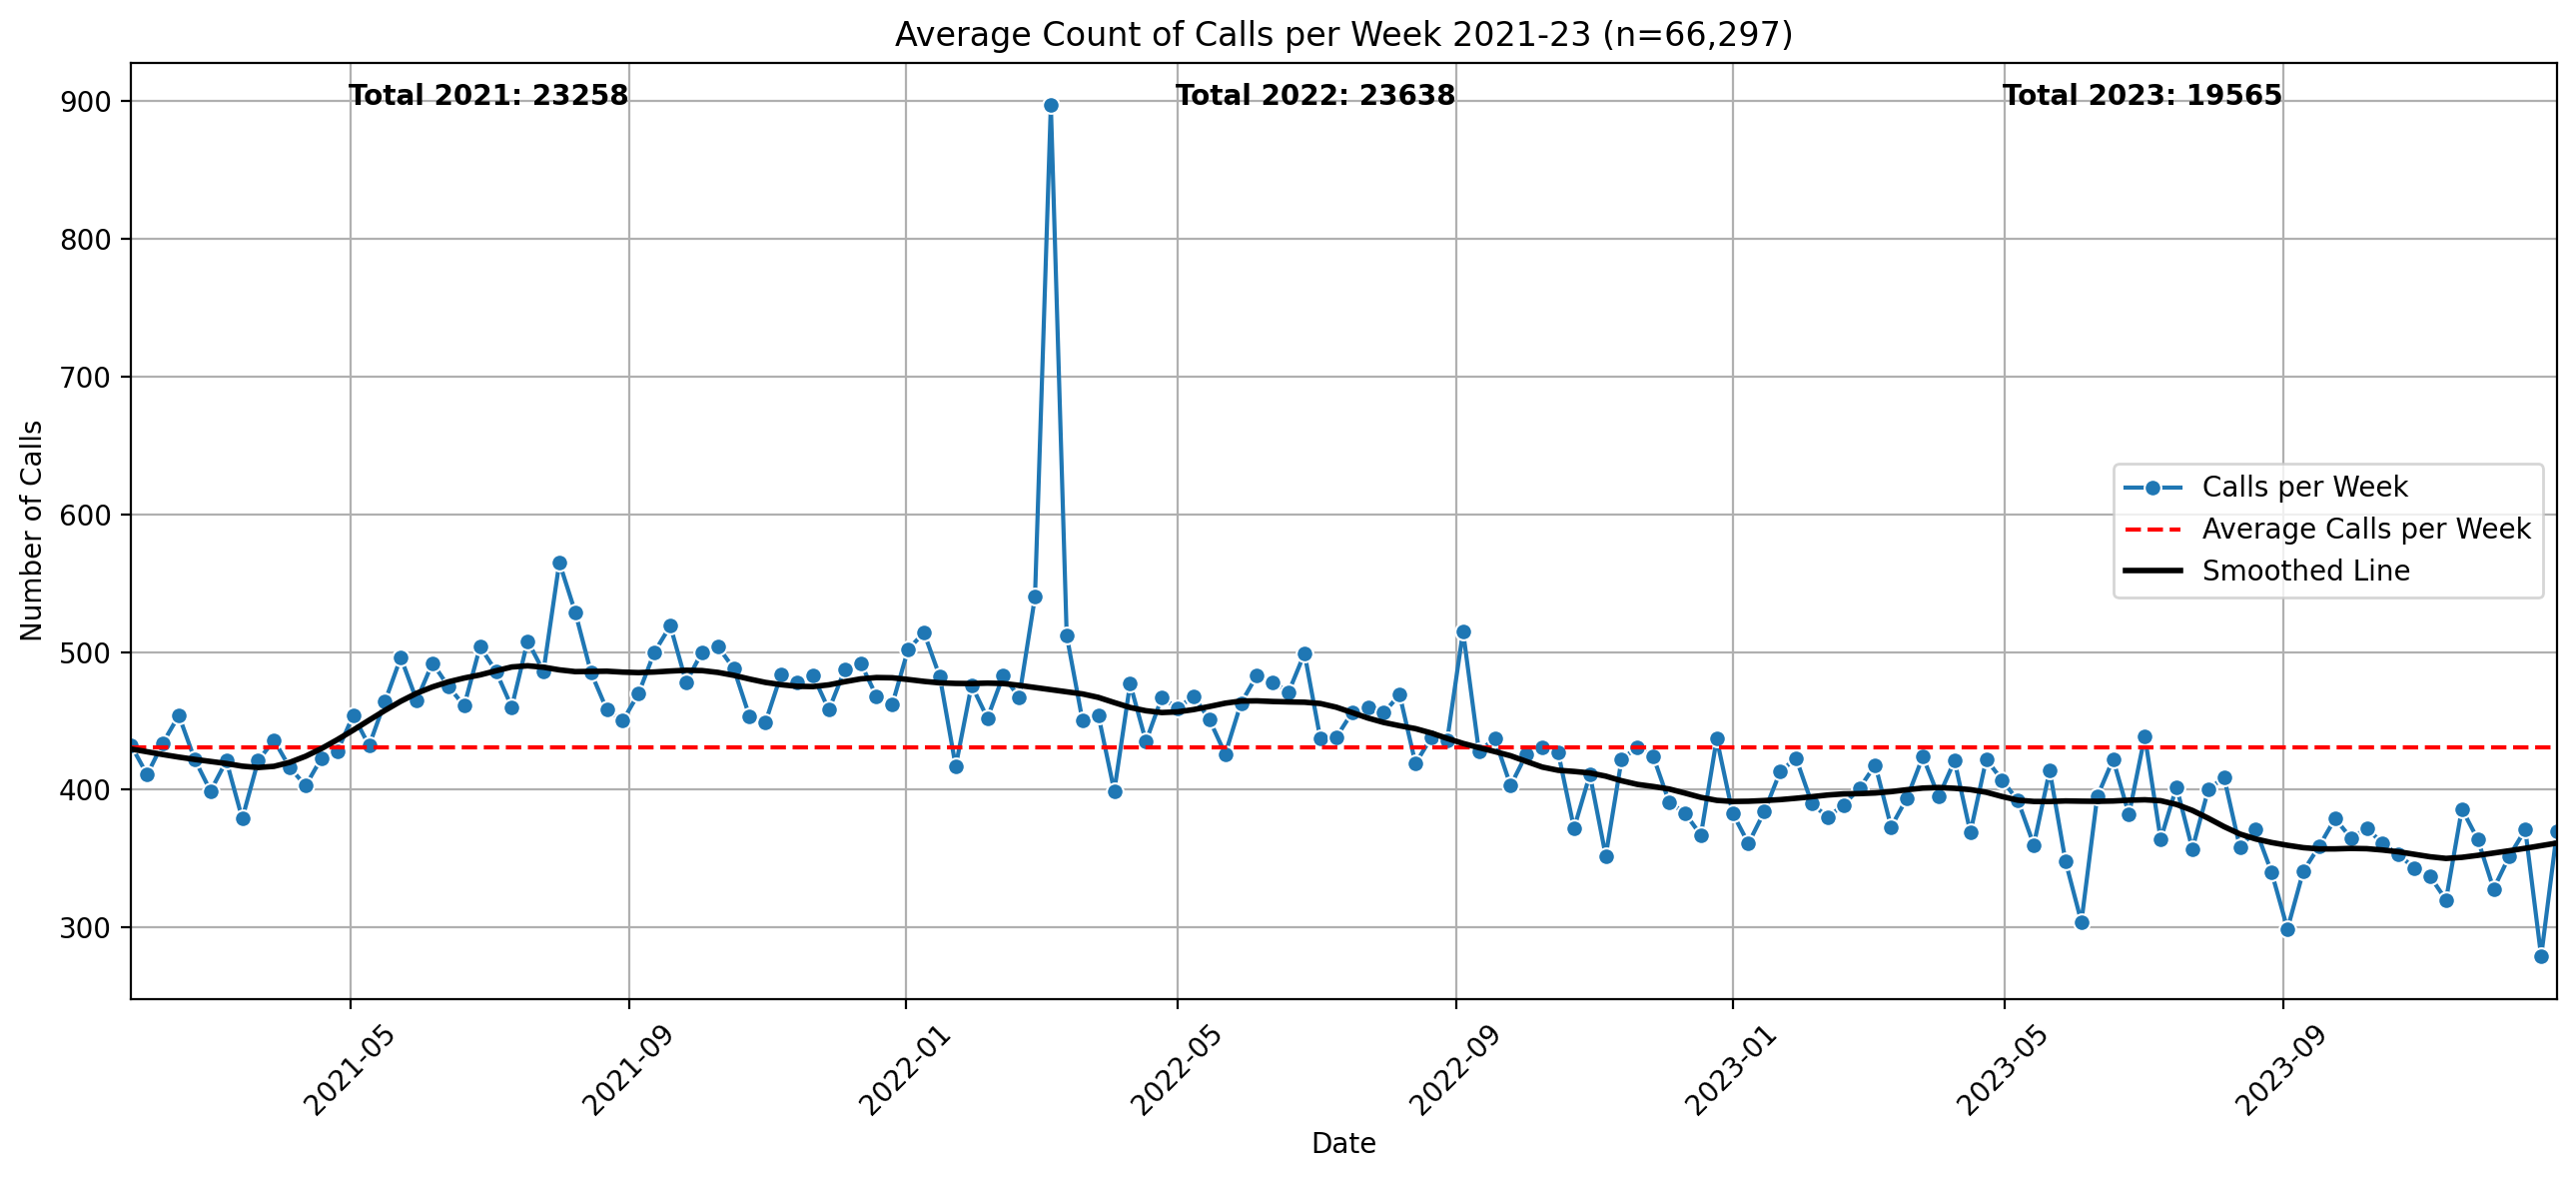

In [23]:
# Assuming 'data' is your DataFrame containing the 'Year' and 'DayOfYear' columns
data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['DayOfYear'].astype(str), format='%Y-%j')

# Grouping the data by week and calculating the average count of calls for each week
calls_per_week = data.groupby(pd.Grouper(key='Date', freq='W')).size().reset_index(name='CallCount')

# Remove the first week
calls_per_week = calls_per_week.iloc[2:]

# Calculate the average calls per week excluding the first week
average_calls_per_week = calls_per_week['CallCount'].mean()

# Calculate annual total calls
annual_totals = data.groupby('Year').size()

# Plotting with Seaborn
plt.figure(figsize=(13, 6), dpi=200)
sns.lineplot(data=calls_per_week, x='Date', y='CallCount', marker='o', linestyle='-', label='Calls per Week', color='#1f77b4')
plt.axhline(y=average_calls_per_week, color='r', linestyle='--', label='Average Calls per Week')

# Calculate lowess smoothed line
lowess_smoothing = sm.nonparametric.lowess(calls_per_week['CallCount'], calls_per_week['Date'], frac=0.1)
plt.plot(calls_per_week['Date'], lowess_smoothing[:, 1], color='black', linewidth=2, label='Smoothed Line')

# Annotate annual totals
for year, total in annual_totals.items():
    plt.text(pd.to_datetime(f'{year}-07-01'), max(calls_per_week['CallCount']), f'Total {year}: {total}', 
             horizontalalignment='center', size='medium', color='black', weight='semibold')

# Ensure the x-axis limits are properly set
plt.xlim(calls_per_week['Date'].min(), calls_per_week['Date'].max())

plt.title('Average Count of Calls per Week 2021-23 (n=66,297)')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)

# Repositioning the legend to the middle right
plt.legend(loc='center right')

plt.grid(True)
plt.tight_layout()
plt.show()

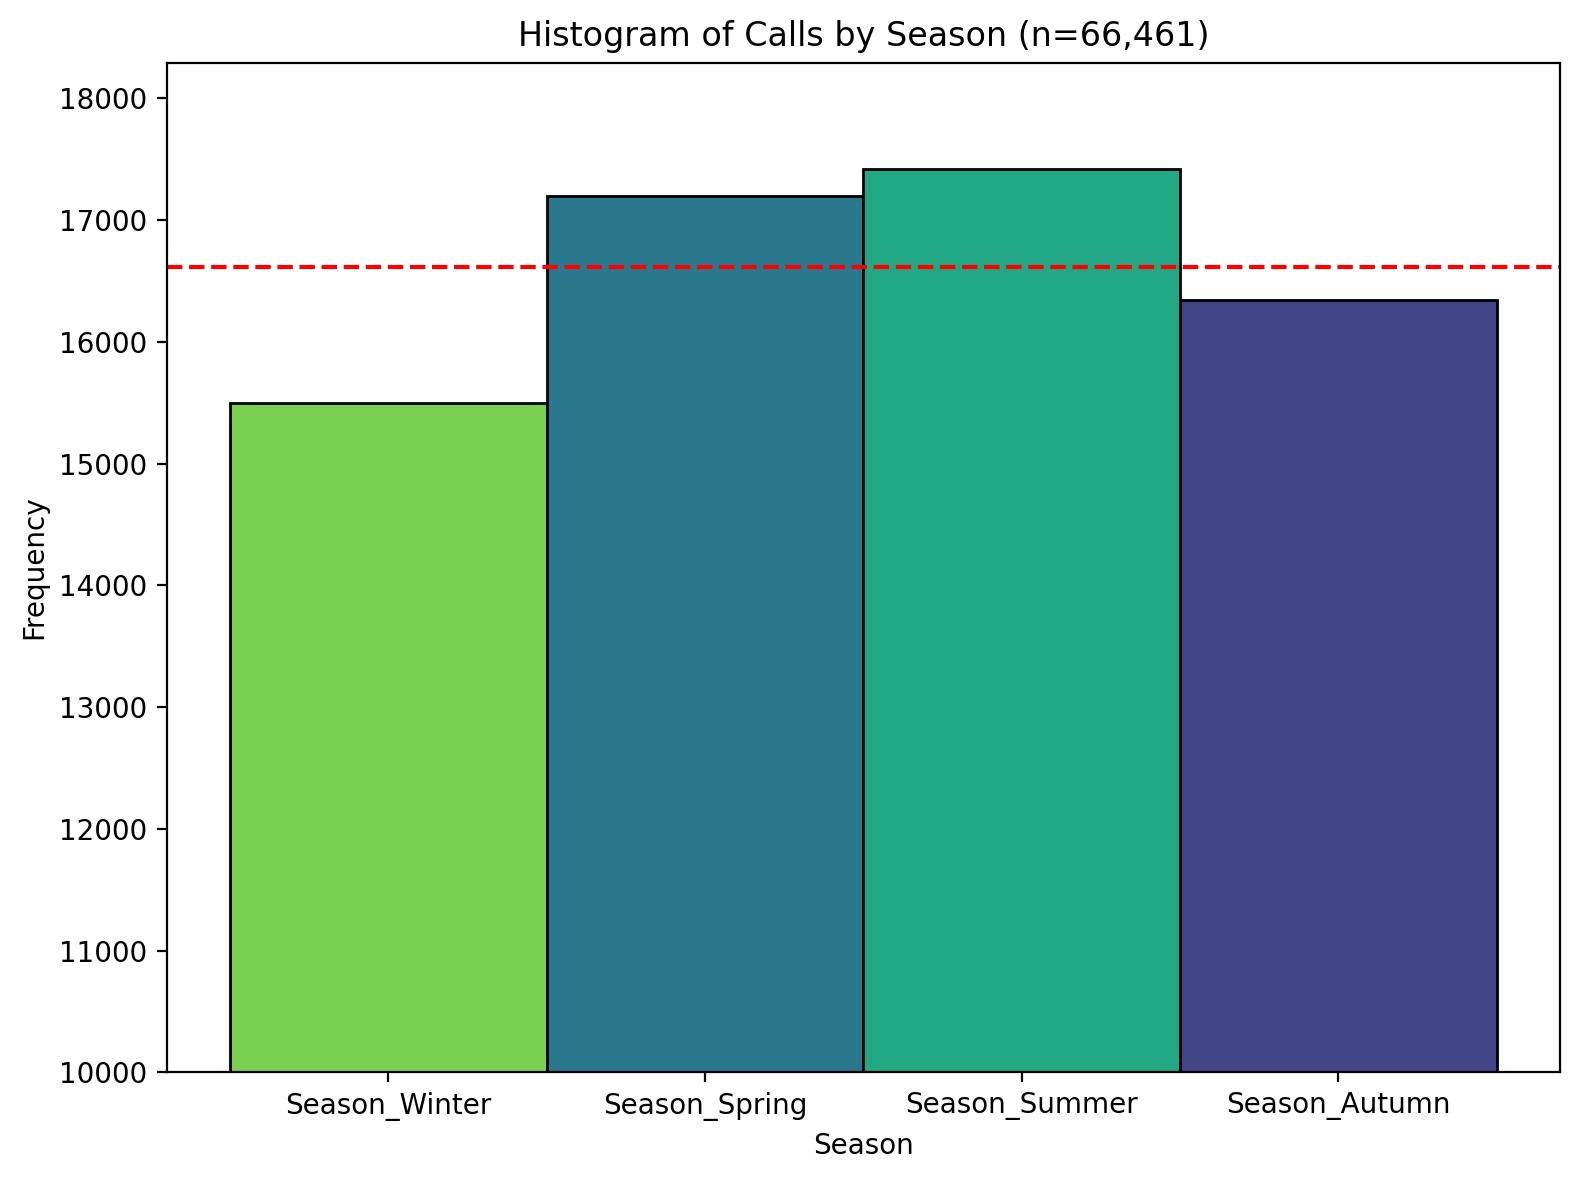

In [24]:
# Sum the occurrences of each season
season_counts = data[['Season_Winter', 'Season_Spring', 'Season_Summer', 'Season_Autumn']].sum(axis=0)

# Define custom color palette representing each season with adjusted colors
custom_palette = {
    'Season_Autumn': sns.color_palette("viridis", 4)[0],  # First color in Viridis for Autumn
    'Season_Spring': sns.color_palette("viridis", 4)[1],  # Second color in Viridis for Spring
    'Season_Summer': sns.color_palette("viridis", 4)[2],  # Third color in Viridis for Summer
    'Season_Winter': sns.color_palette("viridis", 4)[3]   # Fourth color in Viridis for Winter
}

# Reordering the seasons starting with Winter
season_order = ['Season_Winter', 'Season_Spring', 'Season_Summer', 'Season_Autumn']
season_counts = season_counts.reindex(season_order)

# Plotting the histogram by season with custom colors from Viridis
plt.figure(figsize=(8, 6), dpi=200)
custom_colors = [custom_palette[season] for season in season_order]
bar_width = 1  # Adjust the width of the bars
plt.bar(season_counts.index, season_counts.values, width=bar_width, edgecolor='black', color=custom_colors)  # Using custom colors
plt.title('Histogram of Calls by Season (n=66,461)')
plt.xlabel('Season')
plt.ylabel('Frequency')

# Calculate the mean calls per season
mean_calls_per_season = season_counts.mean()

# Plotting the mean calls per season as a horizontal line
plt.axhline(y=mean_calls_per_season, color='red', linestyle='--', label=f'Mean Calls per Season: {mean_calls_per_season:.2f}')

# Set the y-axis lower limit to 10000
plt.ylim(10000, plt.ylim()[1])

plt.tight_layout()
plt.show()

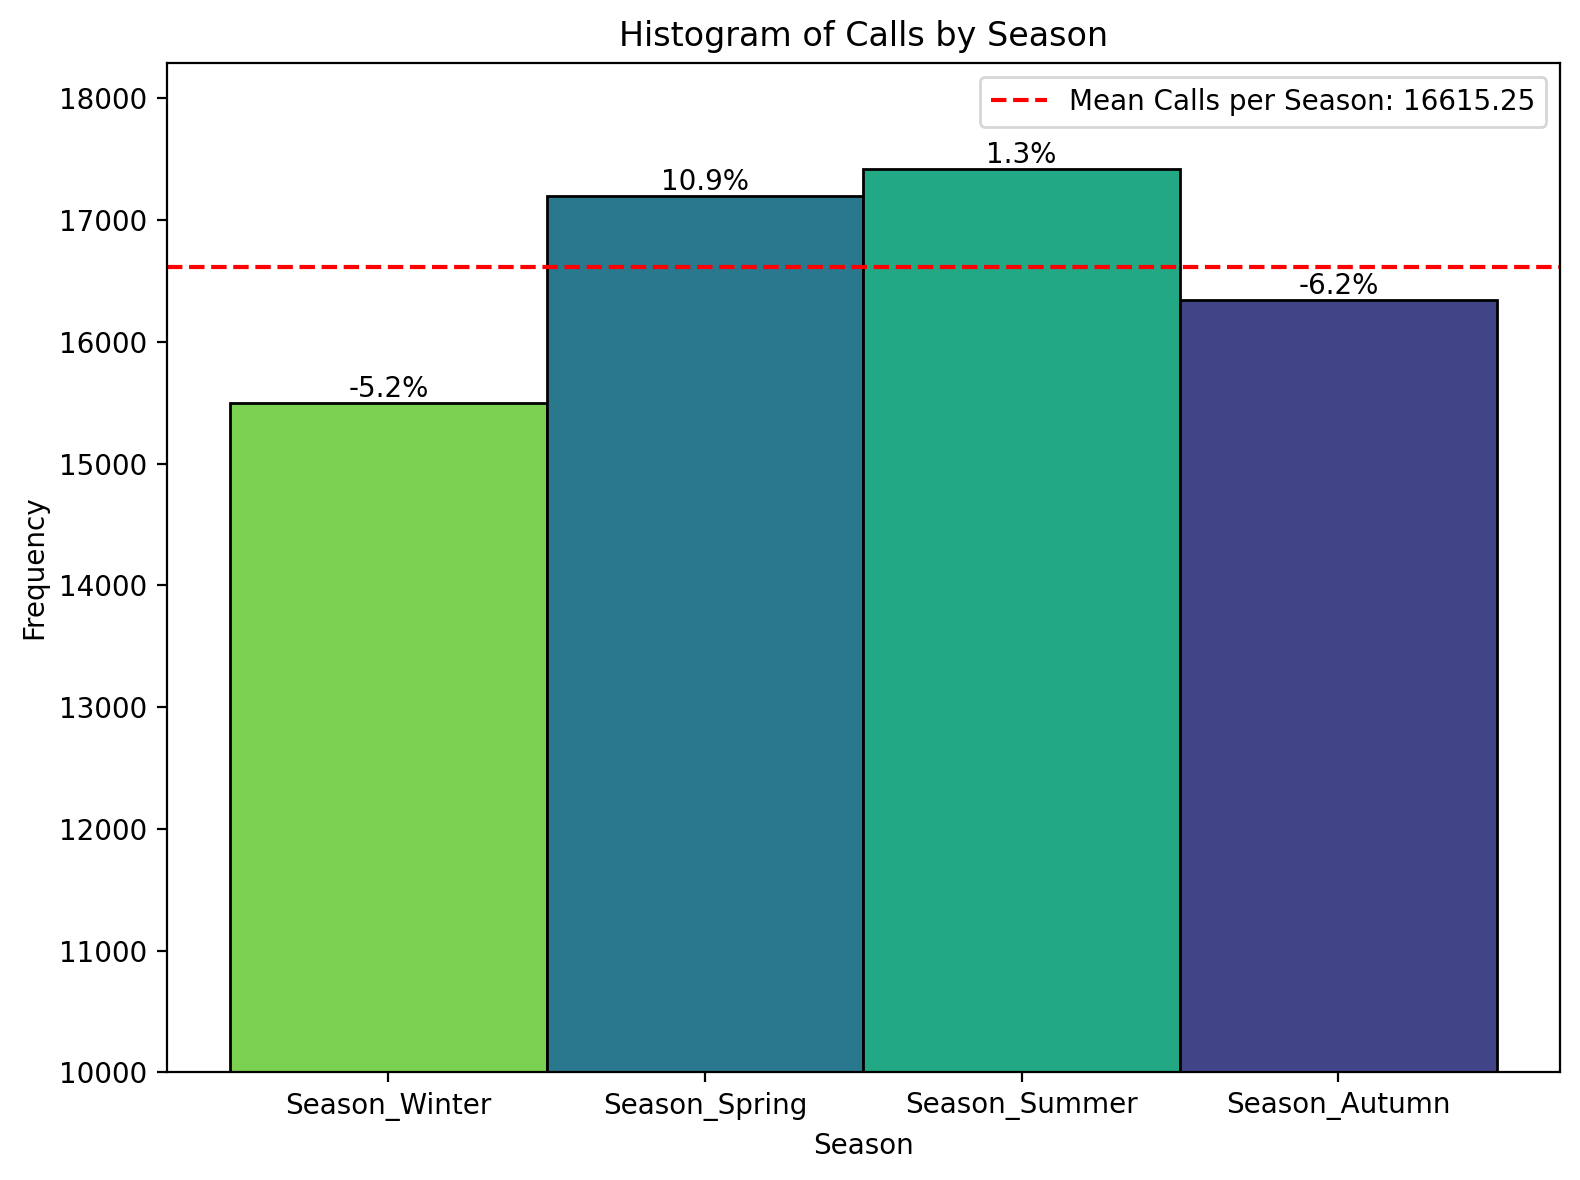

Percentage change between seasons:
Season_Winter    -5.158172
Season_Spring    10.935484
Season_Summer     1.325967
Season_Autumn    -6.198703
dtype: float64


In [25]:
# Sum the occurrences of each season
season_counts = data[['Season_Winter', 'Season_Spring', 'Season_Summer', 'Season_Autumn']].sum(axis=0)

# Define custom color palette representing each season with adjusted colors
custom_palette = {
    'Season_Autumn': sns.color_palette("viridis", 4)[0],  # First color in Viridis for Autumn
    'Season_Spring': sns.color_palette("viridis", 4)[1],  # Second color in Viridis for Spring
    'Season_Summer': sns.color_palette("viridis", 4)[2],  # Third color in Viridis for Summer
    'Season_Winter': sns.color_palette("viridis", 4)[3]   # Fourth color in Viridis for Winter
}

# Reordering the seasons starting with Winter
season_order = ['Season_Winter', 'Season_Spring', 'Season_Summer', 'Season_Autumn']
season_counts = season_counts.reindex(season_order)

# Calculate the percentage change between consecutive seasons
percentage_change = season_counts.pct_change() * 100

# Calculate the percentage change from Autumn to Winter
autumn_to_winter_change = ((season_counts['Season_Winter'] - season_counts['Season_Autumn']) / season_counts['Season_Autumn']) * 100
percentage_change['Season_Winter'] = autumn_to_winter_change

# Plotting the histogram by season with custom colors from Viridis
plt.figure(figsize=(8, 6), dpi=200)
custom_colors = [custom_palette[season] for season in season_order]
bar_width = 1
plt.bar(season_counts.index, season_counts.values, width=bar_width, edgecolor='black', color=custom_colors)  # Using custom colors
plt.title('Histogram of Calls by Season')
plt.xlabel('Season')
plt.ylabel('Frequency')

# Adding percentage change annotations
for i, (count, change) in enumerate(zip(season_counts.values, percentage_change.values)):
    if pd.notnull(change):  # Only annotate where there's a percentage change value
        plt.text(i, count, f'{change:.1f}%', ha='center', va='bottom', fontsize=10, color='black')

# Calculate the mean calls per season
mean_calls_per_season = season_counts.mean()

# Plotting the mean calls per season as a horizontal line
plt.axhline(y=mean_calls_per_season, color='red', linestyle='--', label=f'Mean Calls per Season: {mean_calls_per_season:.2f}')
plt.legend()

# Set the y-axis lower limit to 0
plt.ylim(10000, plt.ylim()[1])

plt.tight_layout()
plt.show()

# Display percentage change
print("Percentage change between seasons:")
print(percentage_change)

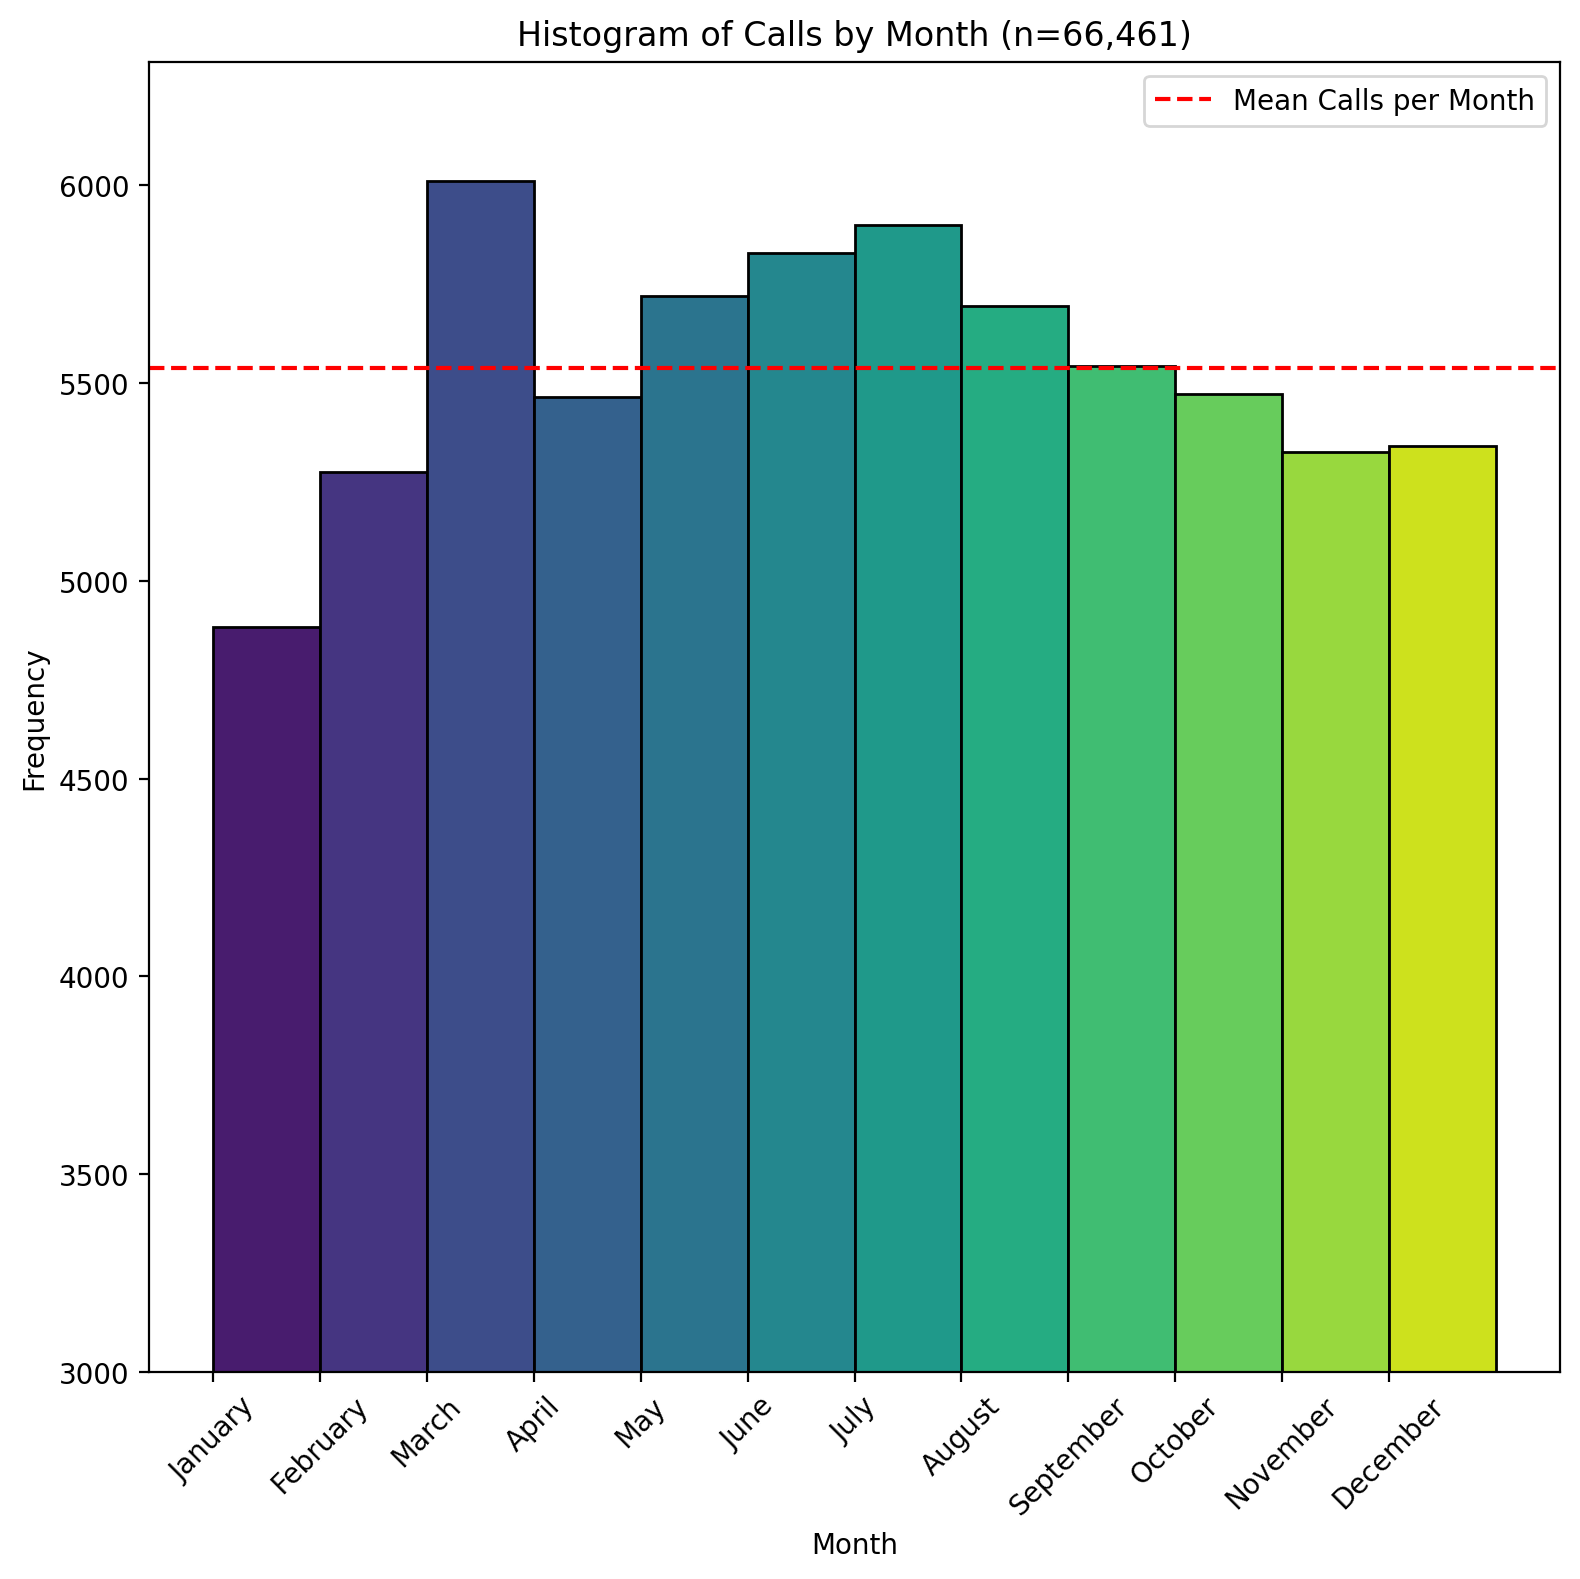

In [26]:
# Define a custom color palette with a chronological gradient for the months
gradient_palette = sns.color_palette("viridis", 12)  # Using Viridis colormap for a smooth gradient
custom_palette = [gradient_palette[i] for i in range(12)]

# Plotting the histogram by month with the custom color palette
plt.figure(figsize=(8, 8), dpi=200)
counts, bins, _ = plt.hist(data['Month'], bins=range(1, 14), edgecolor='black')

# Assigning colors to each bin based on the custom palette
for i in range(len(counts)):
    plt.gca().patches[i].set_facecolor(custom_palette[i])

plt.title('Histogram of Calls by Month (n=66,461)')
plt.xlabel('Month')
plt.ylabel('Frequency')

# Set the tick labels as month names
plt.xticks(range(1, 13), [calendar.month_name[i] for i in range(1, 13)], rotation=45)

# Set the y-axis lower limit to 4000
plt.ylim(3000, plt.ylim()[1])

# Calculate the mean calls per month
mean_calls_per_month = data.groupby('Month').size().mean()

# Plotting the mean calls per month as a horizontal line
plt.axhline(y=mean_calls_per_month, color='r', linestyle='--', label='Mean Calls per Month')

plt.legend()
plt.tight_layout()
plt.show()

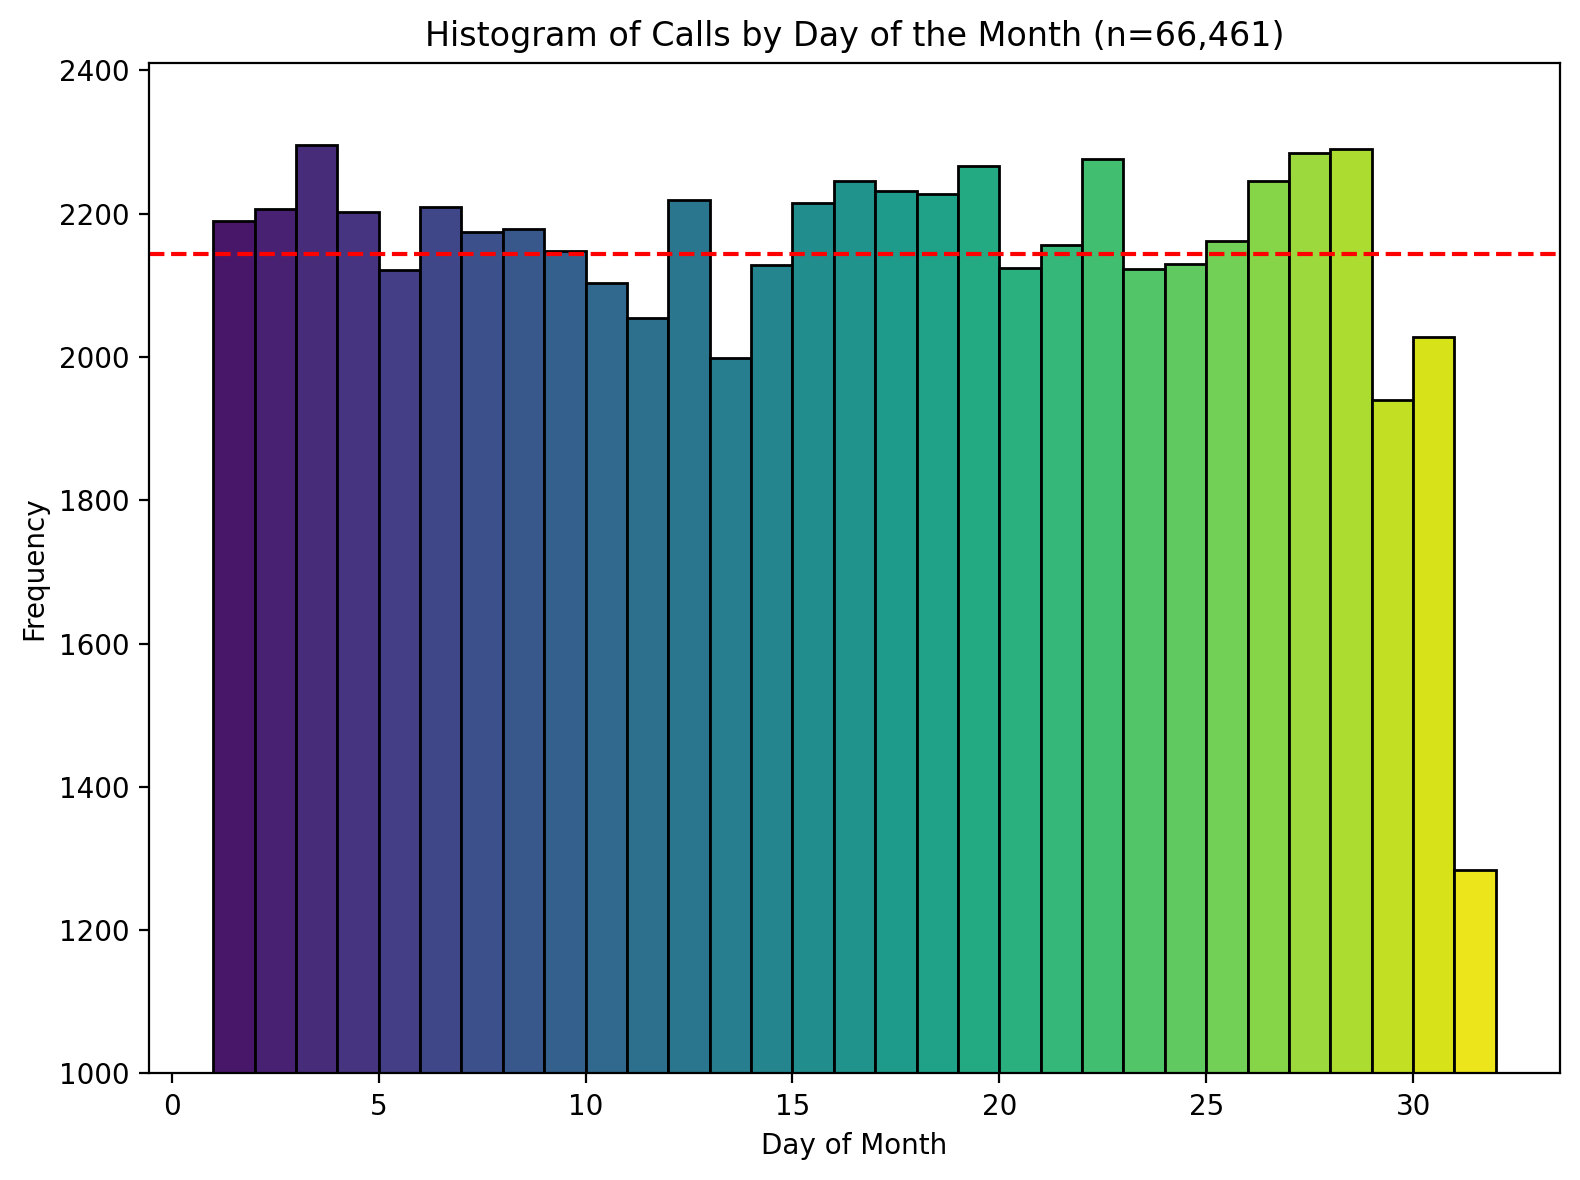

In [27]:
# Define a custom color palette with a chronological gradient for the days of the month
num_days = 32  # Assuming maximum 31 days in a month
gradient_palette = sns.color_palette("viridis", num_days)  # Using Viridis colormap for a smooth gradient
custom_palette = [gradient_palette[i % num_days] for i in range(1, num_days + 1)]  # Adjusting for 1-based indexing

# Plotting the histogram by day of the month with the custom color palette
plt.figure(figsize=(8, 6), dpi=200)
counts, bins, _ = plt.hist(data['DayOfMonth'], bins=range(1, 33), edgecolor='black')

# Assigning colors to each bin based on the custom palette
for i in range(len(counts)):
    plt.gca().patches[i].set_facecolor(custom_palette[i])

plt.title('Histogram of Calls by Day of the Month (n=66,461)')
plt.xlabel('Day of Month')
plt.ylabel('Frequency')

# Set the y-axis lower limit to 1000
plt.ylim(1000, plt.ylim()[1])

# Calculate the mean calls per day
mean_calls_per_day = data.groupby('DayOfMonth').size().mean()

# Plotting the mean calls per day as a horizontal line
plt.axhline(y=mean_calls_per_day, color='r', linestyle='--', label=f'Mean Calls per Day: {mean_calls_per_day:.2f}')

plt.tight_layout()
plt.show()

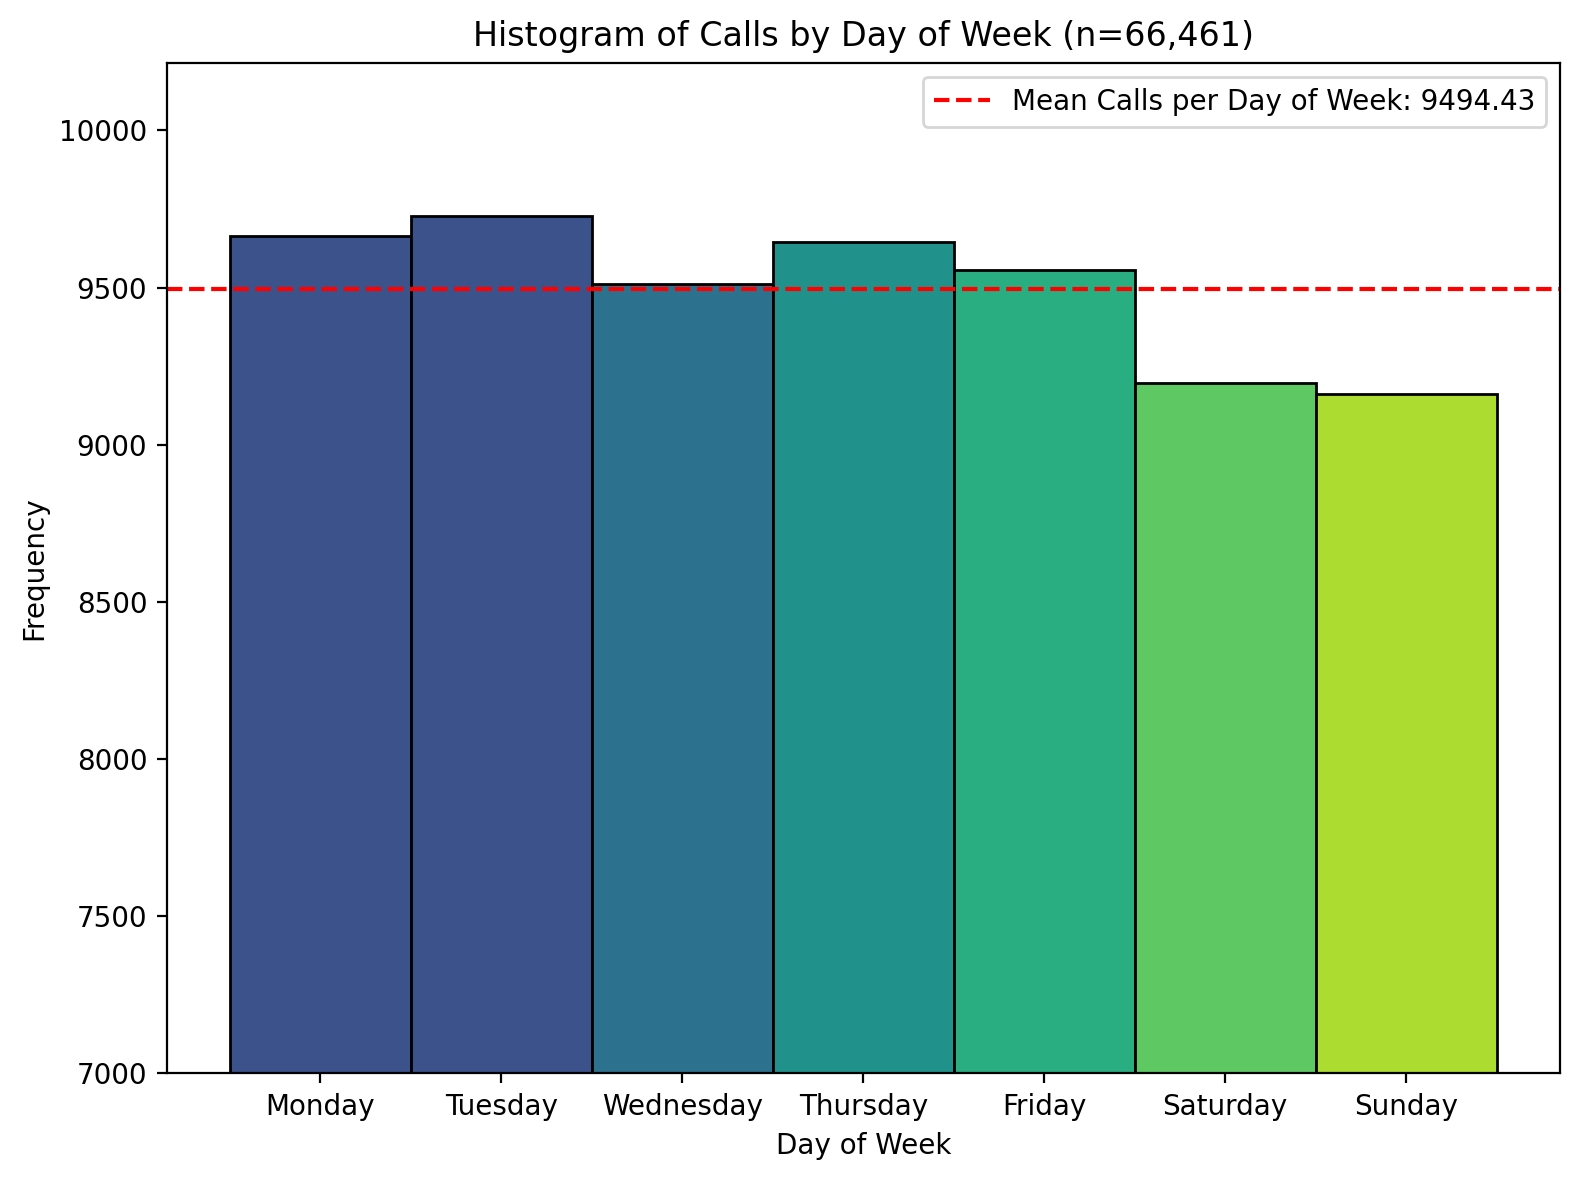

In [28]:
# Define a custom color palette with a chronological gradient for the days of the week
num_days = 7  # Seven days in a week
gradient_palette = sns.color_palette("viridis", num_days)  # Using Viridis colormap for a smooth gradient
custom_palette = [gradient_palette[i % num_days] for i in range(1, num_days + 1)]  # Adjusting for 1-based indexing

# Calculate the mean calls per day of the week
mean_calls_per_day_of_week = data.groupby('DayOfWeek').size().mean()

# Define the days of the week labels
days_of_week_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting the histogram by day of week with the custom color palette
plt.figure(figsize=(8, 6), dpi=200)
counts, bins, _ = plt.hist(data['DayOfWeek'], bins=np.arange(8) - 0.5, edgecolor='black', rwidth=1)

# Assigning colors to each bin based on the custom palette
for i in range(len(counts)):
    plt.gca().patches[i].set_facecolor(custom_palette[int(bins[i])])

plt.title('Histogram of Calls by Day of Week (n=66,461)')
plt.xlabel('Day of Week')
plt.ylabel('Frequency')

# Set the x-axis tick labels as days of the week
plt.xticks(range(7), days_of_week_labels)

# Set the y-axis lower limit
plt.ylim(7000, plt.ylim()[1])

# Plotting the mean calls per day of the week as a horizontal line
plt.axhline(y=mean_calls_per_day_of_week, color='r', linestyle='--', label=f'Mean Calls per Day of Week: {mean_calls_per_day_of_week:.2f}')

plt.legend()
plt.tight_layout()
plt.show()

In [29]:
data['Hour']

0        20
1        14
2        14
3        14
4        16
         ..
66456    21
66457    21
66458    21
66459    22
66460    23
Name: Hour, Length: 66461, dtype: int64

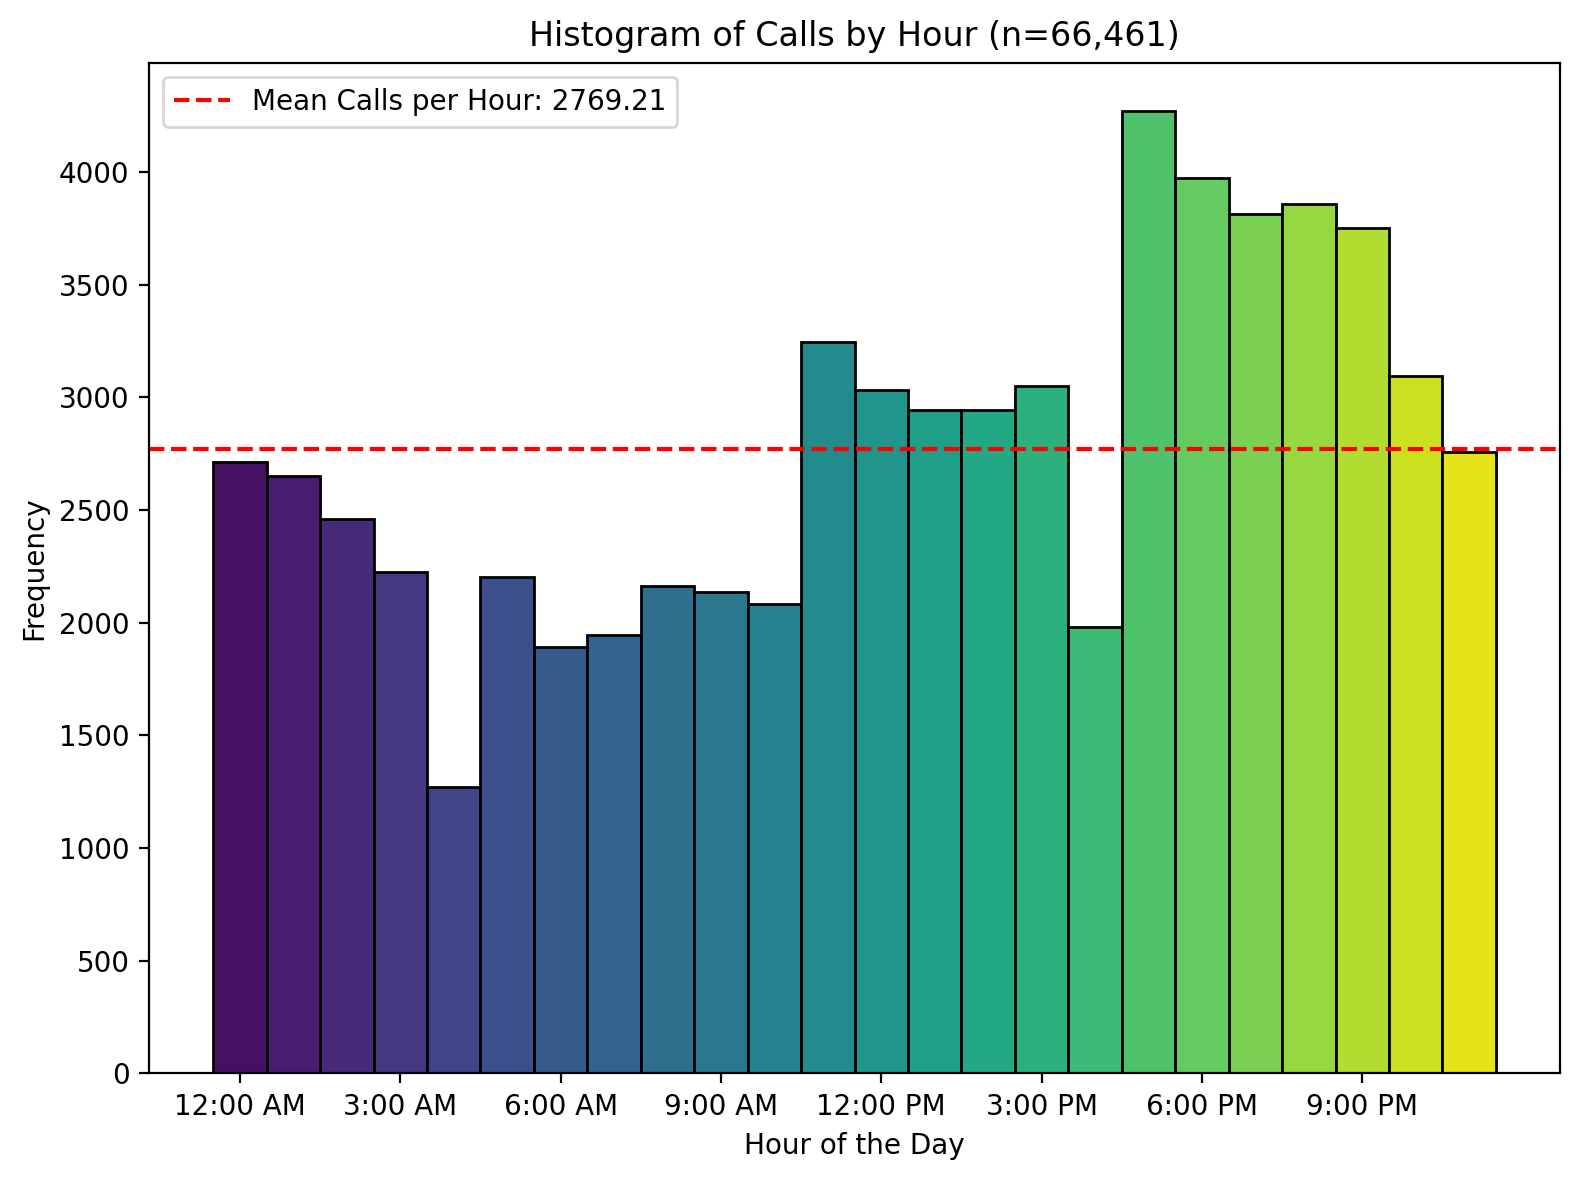

In [30]:
# Sum the occurrences for each hour
hour_counts = data['Hour'].value_counts().sort_index()

# Define a color palette using Viridis colormap
viridis_palette = sns.color_palette("viridis", len(hour_counts))

# Plotting the histogram by hour with the Viridis colors
plt.figure(figsize=(8, 6), dpi=200)
bar_width = 1  # Adjust the width of the bars
bars = plt.bar(hour_counts.index, hour_counts.values, width=bar_width, edgecolor='black', color=viridis_palette)
plt.title('Histogram of Calls by Hour (n=66,461)')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')

# Relabeling x-axis to show every 3rd hour with AM/PM labels
labels = [(f'{(hour % 12) if hour != 12 else 12}:00 {"AM" if hour < 12 else "PM"}') for hour in hour_counts.index[::3]]
labels = ['12:00 AM' if label == '0:00 AM' else label for label in labels]  # Replace '0:00 AM' with '12:00 AM'
plt.xticks(hour_counts.index[::3], labels)

# Adding the mean calls per hour as a horizontal line
mean_calls_per_hour = hour_counts.mean()
plt.axhline(y=mean_calls_per_hour, color='red', linestyle='--', label=f'Mean Calls per Hour: {mean_calls_per_hour:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

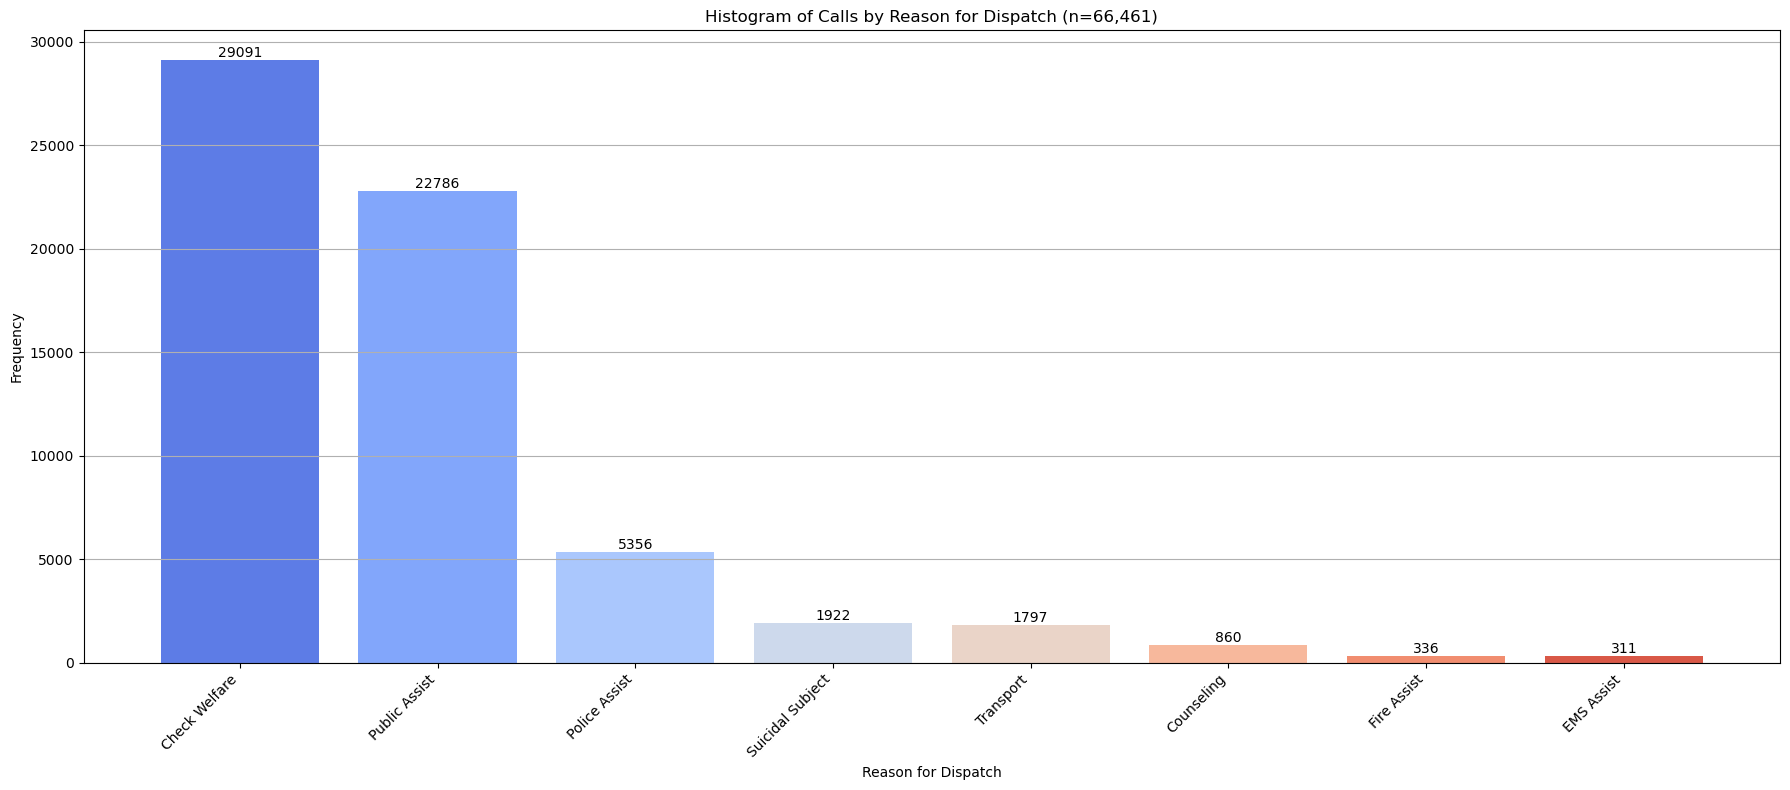

In [31]:
# Summing up the occurrences of each reason for dispatch
reason_counts = data[['Reason for Dispatch_Check Welfare',
       'Reason for Dispatch_Counseling', 'Reason for Dispatch_EMS Assist',
       'Reason for Dispatch_Fire Assist', 'Reason for Dispatch_Police Assist',
       'Reason for Dispatch_Public Assist',
       'Reason for Dispatch_Suicidal Subject', 'Reason for Dispatch_Transport']].sum()

# Sorting the reasons by their counts
reason_counts_sorted = reason_counts.sort_values(ascending=False)

# Remove the prefix 'Reason for Dispatch_' from each label
reason_labels = reason_counts_sorted.index.str.replace('Reason for Dispatch_', '')

# Define a custom color palette with a gradient for the histogram bars
gradient_palette = sns.color_palette("coolwarm", len(reason_labels))

# Plotting the histogram for reasons for dispatch with the custom color palette
plt.figure(figsize=(18, 8))
bars = plt.bar(reason_labels, reason_counts_sorted.values, color=gradient_palette)
plt.title('Histogram of Calls by Reason for Dispatch (n=66,461)')
plt.xlabel('Reason for Dispatch')
plt.ylabel('Frequency')

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Labeling each bar with its count
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [32]:
# Selecting only calls marked as 'Eugene'
eugene_data = data[data['City_Eugene'] == True]
print(len(eugene_data))

# Selecting only calls marked as 'Springfield'
spring_data = data[data['City_Springfield'] == True]
print(len(spring_data))

47662
17408


#### Finding Correlations, p-values, and Sample Sizes

In [33]:
def analyze_column_pairs(data, alpha=0.05):
    # Initialize lists to store correlations, p-values, and sample counts
    col1_list = []
    col2_list = []
    correlation_list = []
    p_value_list = []
    sample_count_list = []
    
    # Iterate through every possible pair of columns
    for i, col1 in enumerate(data.columns):
        for j, col2 in enumerate(data.columns):
            if i < j:  # Avoid analyzing the same pairs twice
                # Extract the pair of columns
                column_pair = data[[col1, col2]].copy()
                
                # Remove rows with missing values in both columns
                column_pair = column_pair.dropna(subset=[col1, col2])
                
                # Convert columns to numeric data types
                column_pair[col1] = pd.to_numeric(column_pair[col1], errors='coerce')
                column_pair[col2] = pd.to_numeric(column_pair[col2], errors='coerce')
                
                # Remove rows with missing values after conversion
                column_pair = column_pair.dropna()
                
                # Check if any of the columns have constant values
                if np.allclose(column_pair[col1], column_pair[col1].iloc[0]) or np.allclose(column_pair[col2], column_pair[col2].iloc[0]):
                    continue  # Skip correlation calculation if one or both columns are constant
                
                # Calculate Pearson correlation coefficient and p-value
                correlation, p_value = pearsonr(column_pair[col1], column_pair[col2])
                
                # Check if the correlation is statistically significant
                if p_value < alpha:
                    # Store significant correlations
                    col1_list.append(col1)
                    col2_list.append(col2)
                    correlation_list.append(correlation)
                    p_value_list.append(p_value)
                    sample_count_list.append(len(column_pair))  # Append the number of samples
    
    # Create a DataFrame to store significant correlations
    significant_correlations = pd.DataFrame({
        'Column 1': col1_list,
        'Column 2': col2_list,
        'Correlation': correlation_list,
        'P-value': p_value_list,
        'Sample Count': sample_count_list
    })
    
    return significant_correlations


# Analyzing column pairs for all data
significant_correlations_all = analyze_column_pairs(data)
# Analyzing column pairs for Eugene data
# significant_correlations_eugene = analyze_column_pairs(eugene_data)
# Analyzing column pairs for Springfield data
# significant_correlations_springfield = analyze_column_pairs(spring_data)

In [34]:
# Display significant correlations for all data
print("Significant Correlations for All Data:")
significant_correlations_all = significant_correlations_all.reindex(significant_correlations_all['Correlation'].abs().sort_values(ascending=False).index)
display(significant_correlations_all)

# Display significant correlations for Eugene data
# print("\nSignificant Correlations for Eugene Data:")
# display(significant_correlations_eugene.reindex(significant_correlations_eugene['Correlation'].abs().sort_values(ascending=False).index))

# Display significant correlations for Springfield data
# print("\nSignificant Correlations for Springfield Data:")
# display(significant_correlations_springfield.reindex(significant_correlations_springfield['Correlation'].abs().sort_values(ascending=False).index))

Significant Correlations for All Data:


,Column 1,Column 2,Correlation,P-value,Sample Count
30,City_Eugene,City_Springfield,-1.000000,0.000000,65070
1462,solarenergy,solarradiation,0.999927,0.000000,66461
164,DayOfYear,Month,0.996324,0.000000,66461
1293,feelslike,temp,0.995553,0.000000,66461
1315,feelslikemax,tempmax,0.994814,0.000000,66461
...,...,...,...,...,...
681,Reason for Dispatch_Public Assist,"conditions_Rain, Partially cloudy",0.008161,0.041392,62459
715,Reason for Dispatch_Suicidal Subject,snowdepth,-0.008103,0.042862,62459
114,DayOfMonth,humidity,-0.008055,0.037842,66461
619,Reason for Dispatch_EMS Assist,sunset_hour,0.008026,0.044875,62459


#### Labeling Call Categorizations

In [35]:
# Filter rows containing specific values for race
race_values = ['Race_alaska native', 'Race_american indian', 'Race_american indian/alaska native',
               'Race_asian', 'Race_black/african american', 'Race_hispanic/latino',
               'Race_native hawaiian/other pacific islander', 'Race_other',
               'Race_two or more races', 'Race_white']

race_correlations = significant_correlations_all[
    (significant_correlations_all['Column 1'].isin(race_values)) | 
    (significant_correlations_all['Column 2'].isin(race_values))
]

# Filter rows containing specific values for gender
gender_values = ['Gender_female', 'Gender_male', 'Gender_non_binary',
                 'Gender_trans_female', 'Gender_trans_male']

gender_correlations = significant_correlations_all[
    (significant_correlations_all['Column 1'].isin(gender_values)) | 
    (significant_correlations_all['Column 2'].isin(gender_values))
]

# Filter rows containing specific values for dispatch
dispatch_values = ['Reason for Dispatch_Check Welfare', 'Reason for Dispatch_Counseling',
                   'Reason for Dispatch_EMS Assist', 'Reason for Dispatch_Fire Assist',
                   'Reason for Dispatch_Police Assist', 'Reason for Dispatch_Public Assist',
                   'Reason for Dispatch_Suicidal Subject', 'Reason for Dispatch_Transport']

dispatch_correlations = significant_correlations_all[
    (significant_correlations_all['Column 1'].isin(dispatch_values)) | 
    (significant_correlations_all['Column 2'].isin(dispatch_values))
]

In [36]:
# Filter rows containing the causal values that we are looking into
causal_values = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'snow', 'snowdepth', 'windgust', 'windspeed', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'pm25', 'Hour', 'DayOfWeek', 'DayOfMonth', 'DayOfYear', 'Year',
       'Month', 'sunrise_hour', 'sunset_hour','preciptype_freezingrain', 'preciptype_rain',
       'preciptype_rain,freezingrain', 'preciptype_rain,snow',
       'preciptype_snow', 'conditions_Clear', 'conditions_Overcast',
       'conditions_Partially cloudy', 'conditions_Rain',
       'conditions_Rain, Freezing Drizzle/Freezing Rain, Overcast',
       'conditions_Rain, Freezing Drizzle/Freezing Rain, Partially cloudy',
       'conditions_Rain, Overcast', 'conditions_Rain, Partially cloudy',
       'conditions_Snow, Rain', 'conditions_Snow, Rain, Overcast',
       'conditions_Snow, Rain, Partially cloudy', 'Season_Autumn',
       'Season_Spring', 'Season_Summer', 'Season_Winter']

#### Removing Correlations without Call Categorizations

In [37]:
# Combine all the values you want to filter on
all_values = race_values + gender_values + dispatch_values

# Filter rows in significant_correlations_all
filtered_correlations = significant_correlations_all[
    (significant_correlations_all['Column 1'].isin(all_values)) | 
    (significant_correlations_all['Column 2'].isin(all_values))
]

# Filter rows in significant_correlations_all
filtered_correlations = filtered_correlations[
    (filtered_correlations['Column 1'].isin(causal_values)) | 
    (filtered_correlations['Column 2'].isin(causal_values))
]

filtered_correlations = filtered_correlations.dropna()
filtered_correlations

,Column 1,Column 2,Correlation,P-value,Sample Count
649,Reason for Dispatch_Police Assist,Year,-0.082107,7.057500e-94,62459
574,Reason for Dispatch_Check Welfare,feelslike,0.081850,2.653907e-93,62459
575,Reason for Dispatch_Check Welfare,feelslikemax,0.081698,5.808574e-93,62459
589,Reason for Dispatch_Check Welfare,tempmax,0.080620,1.442891e-90,62459
588,Reason for Dispatch_Check Welfare,temp,0.080345,5.826210e-90,62459
...,...,...,...,...,...
728,Reason for Dispatch_Transport,conditions_Clear,-0.008165,4.128931e-02,62459
681,Reason for Dispatch_Public Assist,"conditions_Rain, Partially cloudy",0.008161,4.139159e-02,62459
715,Reason for Dispatch_Suicidal Subject,snowdepth,-0.008103,4.286203e-02,62459
619,Reason for Dispatch_EMS Assist,sunset_hour,0.008026,4.487519e-02,62459


In [38]:
filtered_correlations.to_csv('data/filtered_correlations.csv', index=False)
print('CSV saved')

CSV saved


#### Creating Modeling Data

In [39]:
# List of columns to drop
columns_to_drop = ['Age', 'City_Eugene', 'City_Springfield'] + race_values + gender_values + dispatch_values

# Drop the specified columns from 'model_data'
data = data.drop(columns=columns_to_drop)

def preprocess_data(data):
    # Drop rows with any missing values (NAs)
    model_data = data.dropna()

    # Converting all values to integers
    model_data = model_data.astype(int)

    # Reset index after dropping rows
    model_data.reset_index(drop=True, inplace=True)

    # Calculate the number of calls per day without aggregating rows
    calls_per_day = model_data.groupby(['DayOfYear', 'Year']).size().reset_index(name='CallsPerDay')

    # Add 'CallsPerDay' column to the original model_data
    model_data = model_data.merge(calls_per_day, on=['DayOfYear', 'Year'], how='left')
    
    return model_data

# Apply the preprocessing function to the data
all_model_data = preprocess_data(data)

# Print column names and shape of the processed data
print(all_model_data.columns)
print(all_model_data.shape)

Index(['DayOfMonth', 'DayOfWeek', 'DayOfYear', 'Hour', 'Month',
       'Season_Autumn', 'Season_Spring', 'Season_Summer', 'Season_Winter',
       'Year', 'cloudcover', 'conditions_Clear', 'conditions_Overcast',
       'conditions_Partially cloudy', 'conditions_Rain',
       'conditions_Rain, Freezing Drizzle/Freezing Rain, Overcast',
       'conditions_Rain, Freezing Drizzle/Freezing Rain, Partially cloudy',
       'conditions_Rain, Overcast', 'conditions_Rain, Partially cloudy',
       'conditions_Snow, Rain', 'conditions_Snow, Rain, Overcast',
       'conditions_Snow, Rain, Partially cloudy', 'date', 'dew', 'feelslike',
       'feelslikemax', 'feelslikemin', 'humidity', 'pm25', 'precip',
       'precipcover', 'precipprob', 'sealevelpressure', 'snow', 'snowdepth',
       'solarenergy', 'solarradiation', 'sunrise_hour', 'sunset_hour', 'temp',
       'tempmax', 'tempmin', 'uvindex', 'visibility', 'windgust', 'windspeed',
       'Date', 'CallsPerDay'],
      dtype='object')
(66461, 48)


In [40]:
# Saving the aggregated data to a csv file
all_model_data.to_csv('data/all_model_data.csv', index=False)

# Saving the aggregated eugene data to a csv file
# eugene_model_data.to_csv('data/eugene_model_data.csv', index=False)

# Saving the aggregated springfield data to a csv file
# spring_model_data.to_csv('data/spring_model_data.csv', index=False)